In [65]:
from brian2 import *
%matplotlib inline
import sys
sys.path.append('./resonnant')
import resonnant as rs
reload(rs)
import neuraltda.SimplicialComplex as scp

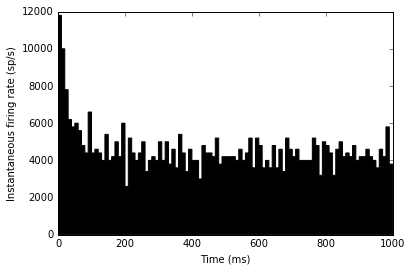

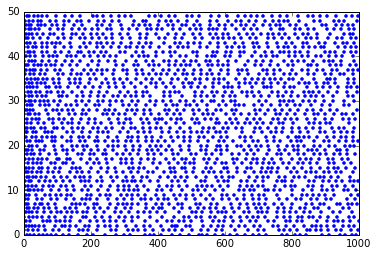

In [4]:
start_scope()

N = 50
tau = 10*ms
vr = -70*mV
vt0 = -50*mV
delta_vt0 = 5*mV
tau_t = 100*ms
sigma = 0.5*(vt0-vr)
v_drive = 2*(vt0-vr)
duration = 1000*ms

eqs = '''
dv/dt = (v_drive+vr-v)/tau + sigma*xi*tau**-0.5 : volt
dvt/dt = (vt0-vt)/tau_t : volt
'''

reset = '''
v = vr
vt += delta_vt0
'''

G = NeuronGroup(N, eqs, threshold='v>vt', reset=reset, refractory=5*ms, method='euler')
spikemon = SpikeMonitor(G)

G.v = 'rand()*(vt0-vr)+vr'
G.vt = vt0

run(duration)

_ = hist(spikemon.t/ms, 100, histtype='stepfilled', facecolor='k', weights=ones(len(spikemon))/(N*defaultclock.dt))
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');
figure()
plot(spikemon.t/ms, spikemon.i, '.')
show()

# Test brian2ephys

In [5]:
# Build brianResults dict
brianTri = [spikemon, spikemon]
stims = ['teststim', 'teststim']
trialLen = 1.0
iti = 5.0
fs = 20000

brianResults = {'brianTrials': brianTri, 'stims': stims, 'trialLen': trialLen, 'nClusters': N, 'iti': iti, 'fs': fs}
ephysDict = rs.brian2ephys(brianResults)

# Test ephys2binned

In [6]:
windt = 25.0
period = {'period': 1}
ncellsperm = 20
nperms = 30
nshuffs = 1 
blockPath = './'


binParams = {'windt': windt, 'period': period, 'ncellsperm': ncellsperm,
             'nperms': nperms, 'nshuffs': nshuffs, 'blockPath': blockPath}

In [41]:
bfdict = rs.ephys2binned(ephysDict, binParams)

In [42]:
print(bfdict)

{'permutedshuff': '/Users/brad/GentnerLab/code/Resonnant/binned_data/20161101T210852Z/permuted_binned/shuffled_controls/', 'permuted': '/Users/brad/GentnerLab/code/Resonnant/binned_data/20161101T210852Z/permuted_binned/', 'analysis_id': '20161101T210852Z-25.0', 'raw': '/Users/brad/GentnerLab/code/Resonnant/binned_data/20161101T210852Z/', 'avgpermshuff': '/Users/brad/GentnerLab/code/Resonnant/binned_data/20161101T210852Z/avgacty/permuted_binned/shuffled_controls/', 'avgpermuted': '/Users/brad/GentnerLab/code/Resonnant/binned_data/20161101T210852Z/avgacty/permuted_binned/', 'trialshuffperm': '/Users/brad/GentnerLab/code/Resonnant/binned_data/20161101T210852Z/trialshuffle/permuted_binned/', 'trialshuffled': '/Users/brad/GentnerLab/code/Resonnant/binned_data/20161101T210852Z/trialshuffle/'}


# Test brian2SimplicialComplex

In [43]:
thresh = 1

sclistraw = rs.brian2SimplicialComplex(brianResults, binParams, thresh, 'raw')

  8%|▊         | 4/50 [00:00<00:01, 38.87it/s]

Building simplex..



 18%|█▊        | 9/50 [00:00<00:01, 30.27it/s]

Building simplex..



100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


In [60]:
for sc in sclistraw:
    print sc.dimension

11
11


In [48]:
for sc in sclistraw:
    sc.updateAdjacency()

In [49]:
spec2 = dict()
for ind, sc in enumerate(sclistraw):
    spec2[ind] = sc.getSpectrum(2)

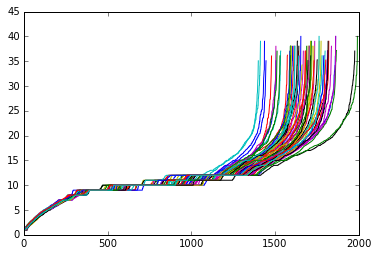

In [31]:
for s in spec2.keys():
    plot(np.sort(np.real(spec2[s])))

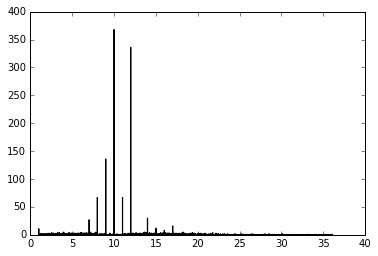

In [39]:
_ =hist(np.real(spec2[s]), 1000, histtype='stepfilled', facecolor='k')

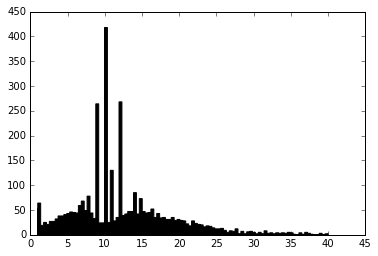

In [61]:
_ =hist(np.real(spec2[0]), 1000, histtype='stepfilled', facecolor='k')
_ =hist(np.real(spec2[1]), 100, histtype='stepfilled', facecolor='k')

In [69]:
rho = sclist[0].computeDensityMatrix(1, 1)

AttributeError: SimplicialComplex instance has no attribute 'densityMatrix'

In [ ]:
s